In [25]:
import numpy as np
import tables as tb
import invisible_cities.database.load_db as dbf

In [2]:
run_number = 4495
nsipms = 1792

In [3]:
sensor_ids = np.array([1023, 1601, 1609, 1687, 1403, 1376, 1379, 1384, 1385, 1386, 1387,
                       1392, 1393, 1394, 1395, 1396, 1397, 1400, 1401, 1402, 1431, 1454,
                       1455, 1462, 1471, 1125], dtype='i4')
charges    = np.array([ 2.66531368,  3.73287782,  5.2828832 ,  2.31351022,  4.41027829,
                        2.20720324,  3.98584685, 14.72511416, 18.30488489,  6.26837369,
                        2.96073255, 14.59842807, 23.50427029,  6.8357565 ,  3.92635856,
                        7.65335644,  2.09604995,  3.67059242,  9.99260022, 10.94429901,
                        2.83670564,  2.89119827,  2.57772977,  2.82898736,  2.83071036,
                        2.26349407], dtype='f4')

In [4]:
DataSiPM = dbf.DataSiPM(run_number)
DataPMT  = dbf.DataPMT(run_number)

## Create voxels

In [5]:
dist = 20.
sipm_dist = np.float32(20.)
sipm_thr = 5. # establish 
sizeX = 2.
sizeY = 2.
rMax = 198

In [6]:
#%%time
#Compute min,max x,y
#size x size y, rmax
selC = (charges > sipm_thr)
xmin = np.float32(DataSiPM.X[sensor_ids[selC]].values.min()-dist)
xmax = np.float32(DataSiPM.X[sensor_ids[selC]].values.max()+dist)
ymin = np.float32(DataSiPM.Y[sensor_ids[selC]].values.min()-dist)
ymax = np.float32(DataSiPM.Y[sensor_ids[selC]].values.max()+dist)
charge = np.float32(charges.mean())
xsize = np.float32(sizeX)
ysize = np.float32(sizeY)
rmax = np.float32(rMax)

#### Call CUDA kernel

In [7]:
import pycuda.driver as cuda
import pycuda.autoinit
import numpy
from pycuda.compiler import SourceModule

#from pycuda.tools import make_default_context
#cuda.init()
#ctx = make_default_context()

#compile cuda code
kernel_code = open('reset_non_compact.cu').read()
mod = SourceModule(kernel_code)
create_voxels = mod.get_function("create_voxels")

#TODO: Check rounding here
threads_x = int((xmax - xmin) / xsize)
threads_y = int((ymax - ymin) / ysize)
print(threads_x, threads_y)

#allocate memory for result
voxels_dt = np.dtype([('x', 'f4'), ('y', 'f4'), ('E', 'f4'), ('active', 'i4')])
num_voxels = threads_x * threads_y
voxels_d = cuda.mem_alloc(num_voxels * voxels_dt.itemsize)


%time create_voxels(voxels_d, xmin, xmax, ymin, ymax, xsize, ysize, rmax, charge, block=(1, 1, 1), grid=(threads_x, threads_y))

#ctx.detach()

40 40
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.46 ms


In [8]:
voxels_h = cuda.from_device(voxels_d, (num_voxels,), voxels_dt)

In [9]:
for h in voxels_h:
    print (h)

(115., 25., 6.396444, 1)
(115., 27., 6.396444, 1)
(115., 29., 6.396444, 1)
(115., 31., 6.396444, 1)
(115., 33., 6.396444, 1)
(115., 35., 6.396444, 1)
(115., 37., 6.396444, 1)
(115., 39., 6.396444, 1)
(115., 41., 6.396444, 1)
(115., 43., 6.396444, 1)
(115., 45., 6.396444, 1)
(115., 47., 6.396444, 1)
(115., 49., 6.396444, 1)
(115., 51., 6.396444, 1)
(115., 53., 6.396444, 1)
(115., 55., 6.396444, 1)
(115., 57., 6.396444, 1)
(115., 59., 6.396444, 1)
(115., 61., 6.396444, 1)
(115., 63., 6.396444, 1)
(115., 65., 6.396444, 1)
(115., 67., 6.396444, 1)
(115., 69., 6.396444, 1)
(115., 71., 6.396444, 1)
(115., 73., 6.396444, 1)
(115., 75., 6.396444, 1)
(115., 77., 6.396444, 1)
(115., 79., 6.396444, 1)
(115., 81., 6.396444, 1)
(115., 83., 6.396444, 1)
(115., 85., 6.396444, 1)
(115., 87., 6.396444, 1)
(115., 89., 6.396444, 1)
(115., 91., 6.396444, 1)
(115., 93., 6.396444, 1)
(115., 95., 6.396444, 1)
(115., 97., 6.396444, 1)
(115., 99., 6.396444, 1)
(115., 101., 6.396444, 1)
(115., 103., 6.396444, 1

(131., 69., 6.396444, 1)
(131., 71., 6.396444, 1)
(131., 73., 6.396444, 1)
(131., 75., 6.396444, 1)
(131., 77., 6.396444, 1)
(131., 79., 6.396444, 1)
(131., 81., 6.396444, 1)
(131., 83., 6.396444, 1)
(131., 85., 6.396444, 1)
(131., 87., 6.396444, 1)
(131., 89., 6.396444, 1)
(131., 91., 6.396444, 1)
(131., 93., 6.396444, 1)
(131., 95., 6.396444, 1)
(131., 97., 6.396444, 1)
(131., 99., 6.396444, 1)
(131., 101., 6.396444, 1)
(131., 103., 6.396444, 1)
(133., 25., 6.396444, 1)
(133., 27., 6.396444, 1)
(133., 29., 6.396444, 1)
(133., 31., 6.396444, 1)
(133., 33., 6.396444, 1)
(133., 35., 6.396444, 1)
(133., 37., 6.396444, 1)
(133., 39., 6.396444, 1)
(133., 41., 6.396444, 1)
(133., 43., 6.396444, 1)
(133., 45., 6.396444, 1)
(133., 47., 6.396444, 1)
(133., 49., 6.396444, 1)
(133., 51., 6.396444, 1)
(133., 53., 6.396444, 1)
(133., 55., 6.396444, 1)
(133., 57., 6.396444, 1)
(133., 59., 6.396444, 1)
(133., 61., 6.396444, 1)
(133., 63., 6.396444, 1)
(133., 65., 6.396444, 1)
(133., 67., 6.396444, 1

(151., 61., 6.396444, 1)
(151., 63., 6.396444, 1)
(151., 65., 6.396444, 1)
(151., 67., 6.396444, 1)
(151., 69., 6.396444, 1)
(151., 71., 6.396444, 1)
(151., 73., 6.396444, 1)
(151., 75., 6.396444, 1)
(151., 77., 6.396444, 1)
(151., 79., 6.396444, 1)
(151., 81., 6.396444, 1)
(151., 83., 6.396444, 1)
(151., 85., 6.396444, 1)
(151., 87., 6.396444, 1)
(151., 89., 6.396444, 1)
(151., 91., 6.396444, 1)
(151., 93., 6.396444, 1)
(151., 95., 6.396444, 1)
(151., 97., 6.396444, 1)
(151., 99., 6.396444, 1)
(151., 101., 6.396444, 1)
(151., 103., 6.396444, 1)
(153., 25., 6.396444, 1)
(153., 27., 6.396444, 1)
(153., 29., 6.396444, 1)
(153., 31., 6.396444, 1)
(153., 33., 6.396444, 1)
(153., 35., 6.396444, 1)
(153., 37., 6.396444, 1)
(153., 39., 6.396444, 1)
(153., 41., 6.396444, 1)
(153., 43., 6.396444, 1)
(153., 45., 6.396444, 1)
(153., 47., 6.396444, 1)
(153., 49., 6.396444, 1)
(153., 51., 6.396444, 1)
(153., 53., 6.396444, 1)
(153., 55., 6.396444, 1)
(153., 57., 6.396444, 1)
(153., 59., 6.396444, 1

(169., 89., 6.396444, 1)
(169., 91., 6.396444, 1)
(169., 93., 6.396444, 1)
(169., 95., 6.396444, 1)
(169., 97., 6.396444, 1)
(169., 99., 6.396444, 1)
(169., 101., 6.396444, 1)
(169., 103., 6.396444, 1)
(171., 25., 6.396444, 1)
(171., 27., 6.396444, 1)
(171., 29., 6.396444, 1)
(171., 31., 6.396444, 1)
(171., 33., 6.396444, 1)
(171., 35., 6.396444, 1)
(171., 37., 6.396444, 1)
(171., 39., 6.396444, 1)
(171., 41., 6.396444, 1)
(171., 43., 6.396444, 1)
(171., 45., 6.396444, 1)
(171., 47., 6.396444, 1)
(171., 49., 6.396444, 1)
(171., 51., 6.396444, 1)
(171., 53., 6.396444, 1)
(171., 55., 6.396444, 1)
(171., 57., 6.396444, 1)
(171., 59., 6.396444, 1)
(171., 61., 6.396444, 1)
(171., 63., 6.396444, 1)
(171., 65., 6.396444, 1)
(171., 67., 6.396444, 1)
(171., 69., 6.396444, 1)
(171., 71., 6.396444, 1)
(171., 73., 6.396444, 1)
(171., 75., 6.396444, 1)
(171., 77., 6.396444, 1)
(171., 79., 6.396444, 1)
(171., 81., 6.396444, 1)
(171., 83., 6.396444, 1)
(171., 85., 6.396444, 1)
(171., 87., 6.396444, 1

(191., 65., 6.396444, 0)
(191., 67., 6.396444, 0)
(191., 69., 6.396444, 0)
(191., 71., 6.396444, 0)
(191., 73., 6.396444, 0)
(191., 75., 6.396444, 0)
(191., 77., 6.396444, 0)
(191., 79., 6.396444, 0)
(191., 81., 6.396444, 0)
(191., 83., 6.396444, 0)
(191., 85., 6.396444, 0)
(191., 87., 6.396444, 0)
(191., 89., 6.396444, 0)
(191., 91., 6.396444, 0)
(191., 93., 6.396444, 0)
(191., 95., 6.396444, 0)
(191., 97., 6.396444, 0)
(191., 99., 6.396444, 0)
(191., 101., 6.396444, 0)
(191., 103., 6.396444, 0)
(193., 25., 6.396444, 1)
(193., 27., 6.396444, 1)
(193., 29., 6.396444, 1)
(193., 31., 6.396444, 1)
(193., 33., 6.396444, 1)
(193., 35., 6.396444, 1)
(193., 37., 6.396444, 1)
(193., 39., 6.396444, 1)
(193., 41., 6.396444, 1)
(193., 43., 6.396444, 1)
(193., 45., 6.396444, 0)
(193., 47., 6.396444, 0)
(193., 49., 6.396444, 0)
(193., 51., 6.396444, 0)
(193., 53., 6.396444, 0)
(193., 55., 6.396444, 0)
(193., 57., 6.396444, 0)
(193., 59., 6.396444, 0)
(193., 61., 6.396444, 0)
(193., 63., 6.396444, 0

## Create anode response

#### Step 1: Initialize sipms with zero charge

In [10]:
kernel_code = open('reset_non_compact.cu').read()
mod = SourceModule(kernel_code)
initiliaze_anode = mod.get_function("initialize_anode")

In [11]:
xs = DataSiPM.X.values.astype('f4')
ys = DataSiPM.Y.values.astype('f4')

x_d = cuda.to_device(xs)
y_d = cuda.to_device(ys)

In [12]:
#allocate memory for result
sensors_dt = np.dtype([('id', 'i4'), ('charge', 'f4'), ('active', 'i1')])
sensors_d = cuda.mem_alloc(nsipms * sensors_dt.itemsize)

In [13]:
%time initiliaze_anode(sensors_d, xmin, xmax, x_d, ymin, ymax, y_d, sipm_dist, block=(1, 1, 1), grid=(nsipms, 1))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 195 µs


#### Step 2: Put the correct charge for active sensors

In [14]:
kernel_code = open('reset_non_compact.cu').read()
mod = SourceModule(kernel_code)
create_anode_response = mod.get_function("create_anode_response")

In [15]:
sensor_ids_d = cuda.to_device(sensor_ids)
charges_d    = cuda.to_device(charges)

In [16]:
nsensors = sensor_ids.shape[0]
%time create_anode_response(sensors_d, sensor_ids_d, charges_d, block=(1, 1, 1), grid=(nsensors, 1))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 173 µs


In [17]:
sensor_ids

array([1023, 1601, 1609, 1687, 1403, 1376, 1379, 1384, 1385, 1386, 1387,
       1392, 1393, 1394, 1395, 1396, 1397, 1400, 1401, 1402, 1431, 1454,
       1455, 1462, 1471, 1125], dtype=int32)

In [18]:
charges

array([ 2.6653137,  3.7328777,  5.282883 ,  2.3135102,  4.4102783,
        2.2072031,  3.9858468, 14.725114 , 18.304884 ,  6.2683735,
        2.9607325, 14.598428 , 23.50427  ,  6.8357563,  3.9263585,
        7.6533566,  2.09605  ,  3.6705923,  9.9926   , 10.944299 ,
        2.8367057,  2.8911982,  2.5777297,  2.8289874,  2.8307104,
        2.263494 ], dtype=float32)

## Select active sensors

In [63]:
pmt_corr_file  = "/home/jmbenlloch/reset_data/mapas/PMT_Map_corr_keV.h5"
sipm_corr_file = "/home/jmbenlloch/reset_data/mapas/SiPM_Map_corr_z0.0_keV.h5"

pmt_corr_h5 = tb.open_file(pmt_corr_file)
sipm_corr_h5 = tb.open_file(sipm_corr_file)

pmts_corr  = pmt_corr_h5. root.ResetMap.PMT [:][['x', 'y', 'factor']]
sipms_corr = sipm_corr_h5.root.ResetMap.SiPM[:][['x', 'y', 'factor']]

In [64]:
active_dt = np.dtype([('id', 'i1')])
active_d = cuda.mem_alloc(num_voxels * nsipms) # TODO: Update after compact
probs_d  = cuda.mem_alloc(num_voxels * nsipms) # TODO: Update after compact

LaunchError: cuMemAlloc failed: unspecified launch failure

In [20]:
kernel_code = open('reset_non_compact.cu').read()
mod = SourceModule(kernel_code)
compute_active_sensors = mod.get_function("compute_active_sensors")

In [21]:
%time compute_active_sensors(active_d, sensors_d, voxels_d, np.int32(nsipms), sipm_dist, block=(1, 1, 1), grid=(num_voxels, 1))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 475 µs


In [82]:
xmin_sipms = sipms_corr[0][0]

In [83]:
type(xmin_sipms)

numpy.float32

In [72]:
pmts_corr

array([(-195., -195., 0.), (-195., -185., 0.), (-195., -175., 0.), ...,
       ( 195.,  175., 0.), ( 195.,  185., 0.), ( 195.,  195., 0.)],
      dtype={'names':['x','y','factor'], 'formats':['<f4','<f4','<f4'], 'offsets':[0,4,8], 'itemsize':20})

In [85]:
step_sipms = (sipms_corr[1][1] - sipms_corr[0][1]).astype('i4')

In [86]:
step_sipms.astype

1

numpy

In [87]:
pmt_corr_file  = "/home/jmbenlloch/reset_data/mapas/PMT_Map_corr_keV.h5"
pmt_corr_h5 = tb.open_file(pmt_corr_file)
pmts_corr  = pmt_corr_h5. root.ResetMap.PMT [:][['x', 'y', 'factor']]
step_pmts  =  pmts_corr[1][1] -  pmts_corr[0][1]


In [125]:
%time pmts_corr = pmt_corr_h5. root.ResetMap.PMT [:][['x', 'y', 'factor']]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 350 µs


In [126]:
import struct
for i in range(0, 20):
    data = struct.unpack('f', bytes(pmts_corr.data)[i*4:(i+1)*4])
    print ("i {}: {}".format(i, data))

i 0: (-195.0,)
i 1: (-195.0,)
i 2: (0.0,)
i 3: (0.0,)
i 4: (0.0,)
i 5: (-195.0,)
i 6: (-185.0,)
i 7: (0.0,)
i 8: (0.0,)
i 9: (0.0,)
i 10: (-195.0,)
i 11: (-175.0,)
i 12: (0.0,)
i 13: (0.0,)
i 14: (0.0,)
i 15: (-195.0,)
i 16: (-165.0,)
i 17: (0.0,)
i 18: (0.0,)
i 19: (0.0,)


In [185]:
corrections_dt = np.dtype([('x', 'f4'), ('y', 'f4'), ('factor', 'f4')])
pmt_table = pmt_corr_h5.root.ResetMap.PMT
pmts_corr = np.array(list(zip(pmt_table.col('x'), pmt_table.col('y'), pmt_table.col('factor'))), dtype=corrections_dt)
import struct
for i in range(0, 80):
    data = struct.unpack('f', bytes(pmts_corr.data)[i*4:(i+1)*4])
    print ("i {}: {}".format(i, data))

i 0: (-195.0,)
i 1: (-195.0,)
i 2: (0.0,)
i 3: (-195.0,)
i 4: (-185.0,)
i 5: (0.0,)
i 6: (-195.0,)
i 7: (-175.0,)
i 8: (0.0,)
i 9: (-195.0,)
i 10: (-165.0,)
i 11: (0.0,)
i 12: (-195.0,)
i 13: (-155.0,)
i 14: (0.0,)
i 15: (-195.0,)
i 16: (-145.0,)
i 17: (0.0,)
i 18: (-195.0,)
i 19: (-135.0,)
i 20: (0.0,)
i 21: (-195.0,)
i 22: (-125.0,)
i 23: (0.0,)
i 24: (-195.0,)
i 25: (-115.0,)
i 26: (0.0,)
i 27: (-195.0,)
i 28: (-105.0,)
i 29: (0.0,)
i 30: (-195.0,)
i 31: (-95.0,)
i 32: (0.0,)
i 33: (-195.0,)
i 34: (-85.0,)
i 35: (0.0,)
i 36: (-195.0,)
i 37: (-75.0,)
i 38: (0.0,)
i 39: (-195.0,)
i 40: (-65.0,)
i 41: (0.0,)
i 42: (-195.0,)
i 43: (-55.0,)
i 44: (187.9910125732422,)
i 45: (-195.0,)
i 46: (-45.0,)
i 47: (190.71664428710938,)
i 48: (-195.0,)
i 49: (-35.0,)
i 50: (197.2778778076172,)
i 51: (-195.0,)
i 52: (-25.0,)
i 53: (198.48020935058594,)
i 54: (-195.0,)
i 55: (-15.0,)
i 56: (200.00698852539062,)
i 57: (-195.0,)
i 58: (-5.0,)
i 59: (200.17071533203125,)
i 60: (-195.0,)
i 61: (5.0,)
i 62

In [162]:
np.array(pmt_corr_h5.root.ResetMap.PMT.col('x'), pmt_corr_h5.root.ResetMap.PMT.col('y'), pmt_corr_h5.root.ResetMap.PMT.col('factor'))

ValueError: only 2 non-keyword arguments accepted

In [184]:
pmts_corr

array([(-195., -195., 0.), (-195., -185., 0.), (-195., -175., 0.), ...,
       ( 195.,  175., 0.), ( 195.,  185., 0.), ( 195.,  195., 0.)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('factor', '<f4')])

[(-195.0, -195.0, 0.0),
 (-195.0, -185.0, 0.0),
 (-195.0, -175.0, 0.0),
 (-195.0, -165.0, 0.0),
 (-195.0, -155.0, 0.0),
 (-195.0, -145.0, 0.0),
 (-195.0, -135.0, 0.0),
 (-195.0, -125.0, 0.0),
 (-195.0, -115.0, 0.0),
 (-195.0, -105.0, 0.0),
 (-195.0, -95.0, 0.0),
 (-195.0, -85.0, 0.0),
 (-195.0, -75.0, 0.0),
 (-195.0, -65.0, 0.0),
 (-195.0, -55.0, 187.99101),
 (-195.0, -45.0, 190.71664),
 (-195.0, -35.0, 197.27788),
 (-195.0, -25.0, 198.48021),
 (-195.0, -15.0, 200.00699),
 (-195.0, -5.0, 200.17072),
 (-195.0, 5.0, 200.83565),
 (-195.0, 15.0, 199.71877),
 (-195.0, 25.0, 197.95561),
 (-195.0, 35.0, 195.98491),
 (-195.0, 45.0, 194.27962),
 (-195.0, 55.0, 196.32309),
 (-195.0, 65.0, 0.0),
 (-195.0, 75.0, 0.0),
 (-195.0, 85.0, 0.0),
 (-195.0, 95.0, 0.0),
 (-195.0, 105.0, 0.0),
 (-195.0, 115.0, 0.0),
 (-195.0, 125.0, 0.0),
 (-195.0, 135.0, 0.0),
 (-195.0, 145.0, 0.0),
 (-195.0, 155.0, 0.0),
 (-195.0, 165.0, 0.0),
 (-195.0, 175.0, 0.0),
 (-195.0, 185.0, 0.0),
 (-195.0, 195.0, 0.0),
 (-185.0, 

# Test

In [36]:
import numpy as np
import tables as tb
import invisible_cities.database.load_db as dbf
import invisible_cities.reco.corrections as corrf

run_number = 4495
nsipms = 1792
npmts = 1

t0 = 578125.0
z = 421.6528125
sensor_ids = np.array([1023, 1601, 1609, 1687, 1403, 1376, 1379, 1384, 1385, 1386, 1387,
                       1392, 1393, 1394, 1395, 1396, 1397, 1400, 1401, 1402, 1431, 1454,
                       1455, 1462, 1471, 1125], dtype='i4')
charges    = np.array([ 2.66531368,  3.73287782,  5.2828832 ,  2.31351022,  4.41027829,
                        2.20720324,  3.98584685, 14.72511416, 18.30488489,  6.26837369,
                        2.96073255, 14.59842807, 23.50427029,  6.8357565 ,  3.92635856,
                        7.65335644,  2.09604995,  3.67059242,  9.99260022, 10.94429901,
                        2.83670564,  2.89119827,  2.57772977,  2.82898736,  2.83071036,
                        2.26349407], dtype='f4')
s2_energy = np.float32(491.47727966) # measured by pmts

#Lifetime correction
ZCorr = corrf.LifetimeCorrection(1093.77, 23.99)

DataSiPM = dbf.DataSiPM(run_number)
DataPMT  = dbf.DataPMT(run_number)

#################
#################
# Create voxels #
#################
#################
dist = 20.
sipm_dist = np.float32(20.)
#pmt_dist = np.float32(205)
pmt_dist = np.float32(10000) # all pmts must be included
sipm_thr = 5.
sizeX = 2.
sizeY = 2.
rMax = 198

#Compute min,max x,y
#size x size y, rmax
selC = (charges > sipm_thr)
xmin = np.float32(DataSiPM.X[sensor_ids[selC]].values.min()-dist)
xmax = np.float32(DataSiPM.X[sensor_ids[selC]].values.max()+dist)
ymin = np.float32(DataSiPM.Y[sensor_ids[selC]].values.min()-dist)
ymax = np.float32(DataSiPM.Y[sensor_ids[selC]].values.max()+dist)
charge = np.float32(charges.mean())
xsize = np.float32(sizeX)
ysize = np.float32(sizeY)
rmax = np.float32(rMax)

# #### Call CUDA kernel
import pycuda.driver as cuda
#import pycuda.autoinit
import numpy
from pycuda.compiler import SourceModule

#create context
from pycuda.tools import make_default_context
cuda.init()
ctx = make_default_context()

#compile cuda code
kernel_code = open('reset_non_compact.cu').read()
mod = SourceModule(kernel_code)
create_voxels = mod.get_function("create_voxels")

#TODO: Check rounding here
threads_x = int((xmax - xmin) / xsize)
threads_y = int((ymax - ymin) / ysize)
print(threads_x, threads_y)

#allocate memory for result
voxels_dt = np.dtype([('x', 'f4'), ('y', 'f4'), ('E', 'f4'), ('active', 'i4')])
num_voxels = threads_x * threads_y
voxels_d = cuda.mem_alloc(num_voxels * voxels_dt.itemsize)

create_voxels(voxels_d, xmin, xmax, ymin, ymax, xsize, ysize, rmax, charge, block=(1, 1, 1), grid=(threads_x, threads_y))

voxels_h = cuda.from_device(voxels_d, (num_voxels,), voxels_dt)
#for h in voxels_h:
#    print (h)


##########################
##########################
## Create anode response #
##########################
##########################
#### Step 1: Initialize sipms with zero charge
#kernel_code = open('reset_non_compact.cu').read()
#mod = SourceModule(kernel_code)
initiliaze_anode = mod.get_function("initialize_anode")

xs_sipms = DataSiPM.X.values.astype('f4')
ys_sipms = DataSiPM.Y.values.astype('f4')
x_sipms_d = cuda.to_device(xs_sipms)
y_sipms_d = cuda.to_device(ys_sipms)

#allocate memory for result
# due to packing the c struct is 12 bytes instead of 9.
# Mem layout to be updated, maybe pragma pack
sensors_dt = np.dtype([('id', 'i4'), ('charge', 'f4'), ('active', 'i4')])
sensors_sipms_d = cuda.mem_alloc(nsipms * sensors_dt.itemsize)

initiliaze_anode(sensors_sipms_d, xmin, xmax, x_sipms_d, ymin, ymax, y_sipms_d, sipm_dist, block=(1, 1, 1), grid=(nsipms, 1))

#### Step 2: Put the correct charge for active sensors
#kernel_code = open('reset_non_compact.cu').read()
#mod = SourceModule(kernel_code)
create_anode_response = mod.get_function("create_anode_response")

sensor_ids_d = cuda.to_device(sensor_ids)
charges_d    = cuda.to_device(charges)

nsensors = sensor_ids.shape[0]
create_anode_response(sensors_sipms_d, sensor_ids_d, charges_d, block=(1, 1, 1), grid=(nsensors, 1))

############################
############################
## Create cathode response #
############################
############################
#xs_pmts = DataPMT.X.values.astype('f4')
#ys_pmts = DataPMT.Y.values.astype('f4')
xs_pmts = np.array([0.], dtype='f4')
ys_pmts = np.array([0.], dtype='f4')
x_pmts_d = cuda.to_device(xs_pmts)
y_pmts_d = cuda.to_device(ys_pmts)

s2e = s2_energy * ZCorr(z).value
sensors_pmts = np.array([(1, s2e, 1)], dtype=sensors_dt)
print(sensors_pmts)
sensors_pmts_d = cuda.mem_alloc(npmts * sensors_dt.itemsize)

##################################################
##################################################
## Select active sensors & compute probabilities #
##################################################
##################################################
corrections_dt = np.dtype([('x', 'f4'), ('y', 'f4'), ('factor', 'f4')])

#Sipms
# Read parametrizations
sipm_corr_file = "/home/jmbenlloch/reset_data/mapas/SiPM_Map_corr_z0.0_keV.h5"
sipm_corr_h5 = tb.open_file(sipm_corr_file)
sipm_table = sipm_corr_h5.root.ResetMap.SiPM
#sipms_corr = sipm_corr_h5.root.ResetMap.SiPM[:][['x', 'y', 'factor']]
sipms_corr = np.array(list(zip(sipm_table.col('x'), sipm_table.col('y'), sipm_table.col('factor'))), dtype=corrections_dt)
step_sipms = sipms_corr[1][1] - sipms_corr[0][1]

xmin_sipms = sipms_corr[0][0]
ymin_sipms = sipms_corr[0][1]

nbins_sipms = (sipms_corr[-1][0] - sipms_corr[0][0]) / step_sipms + 1
nbins_sipms = nbins_sipms.astype('i4')
print("sipm bins ", nbins_sipms)

active_dt = np.dtype([('id', 'i1')])
active_sipms_d = cuda.mem_alloc(num_voxels * nsipms) # TODO: Update after compact
probs_sipms_d  = cuda.mem_alloc(num_voxels * nsipms * 4) # TODO: Update after compact

sipms_corr_d = cuda.to_device(sipms_corr)

compute_active_sensors = mod.get_function("compute_active_sensors")

compute_active_sensors(active_sipms_d, probs_sipms_d, sensors_sipms_d, voxels_d, x_sipms_d, y_sipms_d, np.int32(nsipms), sipm_dist, step_sipms, nbins_sipms, xmin_sipms, ymin_sipms, sipms_corr_d, block=(1, 1, 1), grid=(num_voxels, 1))

sipm_corr_h5.close()

#Pmts
# If using more than 1 pmt, take into account that maximum distance is 205

pmt_corr_file  = "/home/jmbenlloch/reset_data/mapas/PMT_Map_corr_keV.h5"
pmt_corr_h5 = tb.open_file(pmt_corr_file)
pmt_table = pmt_corr_h5.root.ResetMap.PMT
#pmts_corr  = np.copy(pmt_corr_h5. root.ResetMap.PMT [:][['x', 'y', 'factor']])
# we need to explicitly build it to get into memory only (x,y,factor)
# to check: struct.unpack('f', bytes(pmts_corr.data)[i*4:(i+1)*4])
pmts_corr = np.array(list(zip(pmt_table.col('x'), pmt_table.col('y'), pmt_table.col('factor'))), dtype=corrections_dt)
step_pmts  =  pmts_corr[1][1] -  pmts_corr[0][1]

xmin_pmts  =  pmts_corr[0][0]
ymin_pmts  =  pmts_corr[0][1]

nbins_pmts  = ( pmts_corr[-1][0] -  pmts_corr[0][0]) / step_pmts  + 1
nbins_pmts = nbins_pmts.astype('i4')

active_pmts_d = cuda.mem_alloc(num_voxels * npmts) # TODO: Update after compact
probs_pmts_d  = cuda.mem_alloc(num_voxels * npmts * 4) # TODO: Update after compact

pmts_corr_d  = cuda.to_device(pmts_corr)

compute_active_sensors(active_pmts_d, probs_pmts_d, sensors_pmts_d, voxels_d, x_pmts_d, y_pmts_d, np.int32(npmts), pmt_dist, step_pmts, nbins_pmts, xmin_pmts, ymin_pmts, pmts_corr_d, block=(1, 1, 1), grid=(num_voxels, 1))

probs_pmts_h = cuda.from_device(probs_pmts_d, (num_voxels,), np.dtype('f4'))
active_pmts_h = cuda.from_device(active_pmts_d, (num_voxels,), active_dt)
print (probs_pmts_h)
print (active_pmts_h)
#for p in probs_pmts_h:
#    print(p)

pmt_corr_h5.close()

##################
##################
## Run MLEM step #
##################
##################

#allocate memory for output
voxels_out_d = cuda.mem_alloc(voxels_h.nbytes)

#run
mlem_step = mod.get_function("mlem_step")
#mlem_step(voxels_d, voxels_out_d, sensors_sipms_d, sensors_pmts_d, probs_pmts_d, probs_sipms_d, active_sipms_d, active_pmts_d, np.int32(num_voxels), np.int32(nsipms), np.int32(npmts), block=(1, 1, 1), grid=(num_voxels, 1))


iterations = 100
for i in range(iterations):
    if i > 0:
        voxels_d, voxels_out_d = voxels_out_d, voxels_d
    mlem_step(voxels_d, voxels_out_d, sensors_sipms_d, sensors_pmts_d, probs_pmts_d, probs_sipms_d, active_sipms_d, active_pmts_d, np.int32(num_voxels), np.int32(nsipms), np.int32(npmts), block=(1, 1, 1), grid=(num_voxels, 1))

voxels_out_h = cuda.from_device(voxels_out_d, voxels_h.shape, voxels_h.dtype)    
    
##############################
##############################

ctx.detach()


40 40
[(1, 722.64624, 1)]
sipm bins  60
[283.23148 283.23148 283.23148 ...   0.        0.        0.     ]
[(1,) (1,) (1,) ... (1,) (1,) (1,)]


In [37]:
voxels_out_h

array([(115.,  25., 2.2054930e-29, 1), (115.,  27., 2.2631096e-21, 1),
       (115.,  29., 3.5344161e-14, 1), ...,
       (193.,  99., 0.0000000e+00, 0), (193., 101., 0.0000000e+00, 0),
       (193., 103., 0.0000000e+00, 0)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('E', '<f4'), ('active', '<i4')])

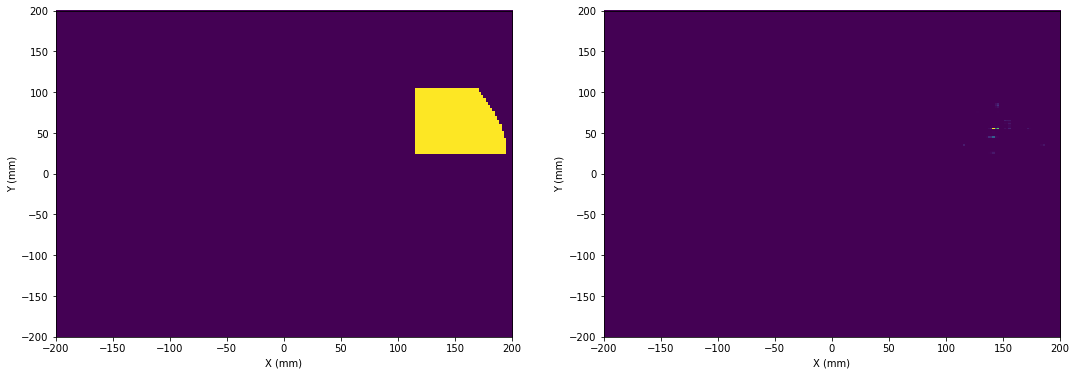

In [41]:
import matplotlib.pylab as plt
from invisible_cities.icaro.hst_functions import hist2d
from invisible_cities.icaro.hst_functions import labels
%matplotlib inline


binsX = 400/sizeX

fig, axes = plt.subplots(1, 2, figsize=(18,6))
plt.sca(axes[0])
_ = hist2d(voxels_h['x'], voxels_h['y'], [binsX, binsX], [[-200.,200.],[-200.,200.]], weights= voxels_h['E'], new_figure=False)
labels("X (mm)", "Y (mm)", "")

plt.sca(axes[1])
_ = hist2d(voxels_out_h['x'], voxels_out_h['y'], [binsX, binsX], [[-200.,200.],[-200.,200.]], weights= voxels_out_h['E'], new_figure=False)
labels("X (mm)", "Y (mm)", "")

#plt.sca(axes[2])
#_ = hist2d(imageIter[0], imageIter[1], [binsX, binsX], [[-200.,200.],[-200.,200.]], weights= imageIter[2], new_figure=False)
#labels("X (mm)", "Y (mm)", "")

In [38]:
voxels_h

array([(115.,  25., 6.396444, 1), (115.,  27., 6.396444, 1),
       (115.,  29., 6.396444, 1), ..., (193.,  99., 6.396444, 0),
       (193., 101., 6.396444, 0), (193., 103., 6.396444, 0)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('E', '<f4'), ('active', '<i4')])

In [40]:
voxels_h = voxels_h[np.where(voxels_h['active'])]
voxels_out_h = voxels_out_h[np.where(voxels_out_h['active'])]